In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter
from IPython.display import Image
import scipy.io

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2018-02-06 11:02:22.742080


In [2]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [3]:
# read in data

Qmat = scipy.io.loadmat(os.path.join(dataDir, "Qstore_1_am_con.mat"))
Vmat = scipy.io.loadmat(os.path.join(dataDir, "ValSp3_ICsave_1_am_con.mat"))

In [4]:
Qmat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Qstore'])

In [5]:
Vmat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ValSp3_ICsave'])

In [6]:
dta = Qmat["Qstore"]
dd = pd.DataFrame(dta)
print(dd.shape)
dd.head()

(10000, 20000)


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000
1,0.000103,0.000041,0.785405,3.926991,1.003792,0.422649,0.048971,0.000594,-0.000117,0.000197,...,0.012709,0.027796,4.027603e-07,-0.000124,0.785407,3.926990,-0.011122,-1.211176,0.066204,-0.005158
2,0.000405,0.000172,0.785416,3.926991,1.983931,0.868754,0.057278,0.003731,-0.000463,0.000785,...,0.032963,0.054989,-5.700732e-06,-0.000489,0.785423,3.926989,-0.049237,-2.395544,0.085917,-0.007513
3,0.000906,0.000393,0.785429,3.926992,2.963612,1.315319,0.064795,0.006861,-0.001037,0.001760,...,0.053276,0.082060,-1.955832e-05,-0.001092,0.785442,3.926987,-0.087493,-3.579753,0.105314,-0.010017
4,0.001603,0.000703,0.785442,3.926994,3.943133,1.762049,0.072037,0.009950,-0.001839,0.003123,...,0.073520,0.109017,-4.117008e-05,-0.001935,0.785465,3.926985,-0.126621,-4.763069,0.123132,-0.012591


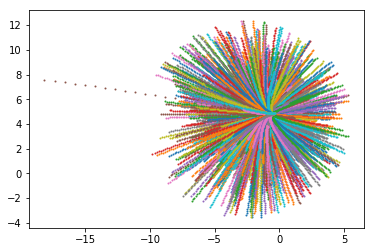

In [85]:
ii = 200

for jj in np.arange(0, dta.shape[0], step = 8):
    plt.scatter(dta[ii:ii+100, jj], dta[ii:ii+100, jj + 1], s = 1)

In [24]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [64]:
# another possible way to rearrange the data
ss = 8
a = dta
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb.shape

(25000000, 8)

In [69]:
a.shape[1]
a.shape[0]
pd.DataFrame(a[0:10, :])

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000
1,0.000103,0.000041,0.785405,3.926991,1.003792,0.422649,0.048971,0.000594,-0.000117,0.000197,...,0.012709,0.027796,4.027603e-07,-0.000124,0.785407,3.926990,-0.011122,-1.211176,0.066204,-0.005158
2,0.000405,0.000172,0.785416,3.926991,1.983931,0.868754,0.057278,0.003731,-0.000463,0.000785,...,0.032963,0.054989,-5.700732e-06,-0.000489,0.785423,3.926989,-0.049237,-2.395544,0.085917,-0.007513
3,0.000906,0.000393,0.785429,3.926992,2.963612,1.315319,0.064795,0.006861,-0.001037,0.001760,...,0.053276,0.082060,-1.955832e-05,-0.001092,0.785442,3.926987,-0.087493,-3.579753,0.105314,-0.010017
4,0.001603,0.000703,0.785442,3.926994,3.943133,1.762049,0.072037,0.009950,-0.001839,0.003123,...,0.073520,0.109017,-4.117008e-05,-0.001935,0.785465,3.926985,-0.126621,-4.763069,0.123132,-0.012591
5,0.002498,0.001104,0.785458,3.926996,4.922914,2.208521,0.079734,0.012952,-0.002869,0.004875,...,0.093669,0.135864,-7.065099e-05,-0.003017,0.785492,3.926982,-0.165223,-5.946883,0.141772,-0.015388
6,0.003592,0.001596,0.785475,3.926999,5.902626,2.655067,0.087317,0.015904,-0.004127,0.007016,...,0.113300,0.162629,-1.079619e-04,-0.004339,0.785522,3.926979,-0.204053,-7.130440,0.159928,-0.018324
7,0.004884,0.002178,0.785493,3.927003,6.882362,3.101593,0.094950,0.018795,-0.005615,0.009546,...,0.133298,0.189256,-1.530744e-04,-0.005899,0.785557,3.926975,-0.243269,-8.313577,0.177321,-0.021378
8,0.006372,0.002849,0.785513,3.927007,7.861614,3.548608,0.101757,0.021684,-0.007332,0.012467,...,0.153216,0.215774,-2.060042e-04,-0.007697,0.785594,3.926970,-0.281558,-9.497604,0.196214,-0.024695
9,0.008059,0.003611,0.785534,3.927011,8.841290,3.995204,0.109309,0.024470,-0.009276,0.015774,...,0.172901,0.242195,-2.668297e-04,-0.009736,0.785636,3.926965,-0.320266,-10.681170,0.214274,-0.028127


In [73]:
for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
cc = pd.DataFrame(bb)
cc.columns = new_cols
cc

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000
1,0.000103,0.000041,0.785405,3.926991,1.003792,0.422649,0.048971,0.000594
2,0.000405,0.000172,0.785416,3.926991,1.983931,0.868754,0.057278,0.003731
3,0.000906,0.000393,0.785429,3.926992,2.963612,1.315319,0.064795,0.006861
4,0.001603,0.000703,0.785442,3.926994,3.943133,1.762049,0.072037,0.009950
5,0.002498,0.001104,0.785458,3.926996,4.922914,2.208521,0.079734,0.012952
6,0.003592,0.001596,0.785475,3.926999,5.902626,2.655067,0.087317,0.015904
7,0.004884,0.002178,0.785493,3.927003,6.882362,3.101593,0.094950,0.018795
8,0.006372,0.002849,0.785513,3.927007,7.861614,3.548608,0.101757,0.021684
9,0.008059,0.003611,0.785534,3.927011,8.841290,3.995204,0.109309,0.024470


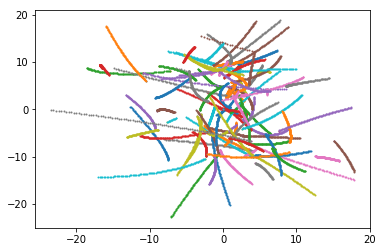

In [75]:
for ii in np.arange(0, 10000, step = 100):
    plt.scatter(cc.loc[ii:ii+100, "x"],cc.loc[ii:ii+100, "y"], s = 1)

In [16]:
dd2 = dta.reshape((-1, 8))
dd3 = pd.DataFrame(dd2)

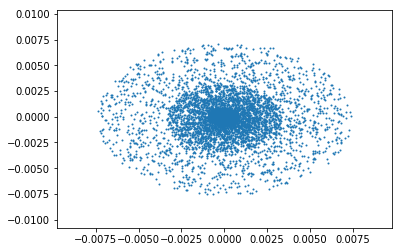

In [23]:
dd3.columns =  ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]
dd3.head()

plt.scatter(dd3.loc[1:10000, "x"],dd3.loc[1:10000, "y"], s = 1 )

In [7]:
dta.shape[1]

20000

In [8]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [9]:
initialCond = dta[np.arange(0, dta.shape[0], step = 100),: ]
finalCond = dta[np.arange(99, dta.shape[0], step = 100), :]

In [10]:
# reshape data
i2 = initialCond.reshape((250000, 8))
f2 = finalCond.reshape((250000, 8))

In [11]:
#pd.DataFrame(i2[2495:2555, ])

In [86]:
conddta = np.hstack((i2, f2))
condDta2 = pd.DataFrame(conddta)
condDta2.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))
print(condDta2.shape)
condDta2.head()

(250000, 16)


,x_i,y_i,theta_i,phi_i,x_dot_i,y_dot_i,theta_dot_i,phi_dot_i,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,0.968817,0.443503,0.792317,3.928647,96.741614,44.518128,0.579362,0.105284
1,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-1.141089,1.901742,0.829301,3.942507,-115.911668,189.558075,3.781962,0.970563
2,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.221566,0.473263,0.792738,3.938398,-22.267928,47.326604,0.668543,1.090916
3,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-2.419618,6.005867,0.839302,3.976986,-248.123231,598.452247,4.329931,3.878763
4,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-1.969747,-0.331231,0.788964,3.947531,-196.920202,-33.251375,0.378515,2.055139


In [87]:
Vmat = scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_con.mat"))
Vmat

{'ValSp3': array([[  9.68816728e-01,  -1.14108919e+00,  -2.21565883e-01, ...,
           1.44231432e+00,  -1.02157931e-01,  -3.67196444e-02],
        [  4.43503409e-01,   1.90174176e+00,   4.73262903e-01, ...,
           4.48031415e-01,   2.58135586e+00,  -1.17053301e+00],
        [  7.92317101e-01,   8.29301027e-01,   7.92738125e-01, ...,
           7.96897414e-01,   8.02561837e-01,   8.00492993e-01],
        ..., 
        [  6.43171385e-02,   1.72410053e+00,   1.81740044e+00, ...,
           4.54029569e+00,   2.52258553e+00,   2.16110728e+00],
        [  8.41647788e+04,  -4.59228815e+04,   6.35414711e+04, ...,
          -2.04216859e+04,  -2.58686376e+03,  -1.77984308e+04],
        [             nan,              nan,              nan, ...,
           1.47369478e+09,   5.79420612e+08,              nan]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Dec 16 23:55:36 2017',
 '__version__': '1.0'}

In [91]:
# this might work
forceAngle = np.transpose(Vmat["ValSp3"])
fa = forceAngle.reshape((250000, 12), order = "C" )
fa2=  pd.DataFrame(fa)
fa2.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
fa2["Fx"] = fa2.F * np.cos(fa2.alpha)
fa2["Fy"] = fa2.F * np.sin(fa2.alpha)
fa2
combDF = pd.merge(condDta2.dropna(), fa2.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")


In [92]:
combDF

,x_i,y_i,theta_i,phi_i,x_dot_i,y_dot_i,theta_dot_i,phi_dot_i,x,y,...,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tao,cost,Fx,Fy
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,0.968817,0.443503,...,96.741614,44.518128,0.579362,0.105284,6381.845153,6.084240,13183.387403,4.179519e+08,6255.966663,-1261.280566
1,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-1.141089,1.901742,...,-115.911668,189.558075,3.781962,0.970563,13311.590039,1.279596,88270.211620,7.807610e+07,3821.792206,12751.169896
2,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-0.221566,0.473263,...,-22.267928,47.326604,0.668543,1.090916,3897.277025,1.106111,-12274.028413,3.972981e+08,1746.530301,3484.020683
3,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-2.419618,6.005867,...,-248.123231,598.452247,4.329931,3.878763,36814.819368,1.149410,28313.300409,1.361690e+09,15058.212175,33594.362193
4,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-1.969747,-0.331231,...,-196.920202,-33.251375,0.378515,2.055139,10861.320196,2.424572,-48780.397529,8.197244e+08,-8186.907034,7137.424579
5,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,3.272575,4.530457,...,325.199334,454.308655,1.783463,0.565227,31656.239657,0.178379,38694.963412,5.426049e+08,31153.939614,5616.899121
6,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,5.853931,2.284786,...,585.193606,228.275942,-0.207283,-1.765246,34991.966455,5.898909,42761.033028,3.459292e+08,32440.004871,-13118.071518
7,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-4.572613,5.909143,...,-464.408711,585.759598,5.650030,5.294045,42215.163659,1.417122,27231.956325,1.473198e+09,6461.884327,41717.671240
8,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,3.971104,2.542336,...,396.562705,254.770506,0.656093,-0.583718,26540.962633,6.101337,35096.664252,1.593677e+08,26103.330546,-4799.878322
9,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-4.461254,-0.137268,...,-445.276499,-18.238283,6.814821,4.041086,24716.159519,2.328413,68882.619634,9.525020e+08,-16984.741490,17955.698201


In [93]:
from sklearn.model_selection import train_test_split

In [99]:
combDF.dropna().iloc[:, 0:16]

,x_i,y_i,theta_i,phi_i,x_dot_i,y_dot_i,theta_dot_i,phi_dot_i,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,0.968817,0.443503,0.792317,3.928647,96.741614,44.518128,0.579362,0.105284
1,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-1.141089,1.901742,0.829301,3.942507,-115.911668,189.558075,3.781962,0.970563
2,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-0.221566,0.473263,0.792738,3.938398,-22.267928,47.326604,0.668543,1.090916
3,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-2.419618,6.005867,0.839302,3.976986,-248.123231,598.452247,4.329931,3.878763
4,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-1.969747,-0.331231,0.788964,3.947531,-196.920202,-33.251375,0.378515,2.055139
5,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,3.272575,4.530457,0.807311,3.936246,325.199334,454.308655,1.783463,0.565227
6,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,5.853931,2.284786,0.783593,3.908270,585.193606,228.275942,-0.207283,-1.765246
7,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-4.572613,5.909143,0.852070,3.991041,-464.408711,585.759598,5.650030,5.294045
8,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,3.971104,2.542336,0.793195,3.921564,396.562705,254.770506,0.656093,-0.583718
9,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.00000,0.000000,-4.461254,-0.137268,0.841078,3.959361,-445.276499,-18.238283,6.814821,4.041086


In [100]:
# drop NA's
X = np.array(combDF.dropna().iloc[:, 0:16])
Y = np.array(combDF.dropna().iloc[:, [18, 20, 21]])

# check: refref: not checked
print(all(X[:,9] == Y[:,1]))
print(len(X))

#Y = Y[:, [10, 12, 13]]
Y.shape

False
218757


(218757, 3)

In [101]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [103]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [104]:
mpreds = mor.predict(Xtest)

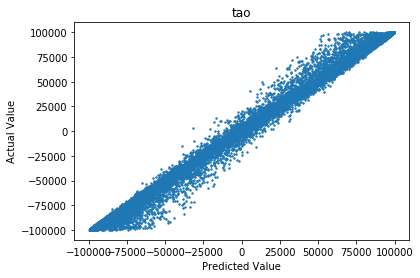

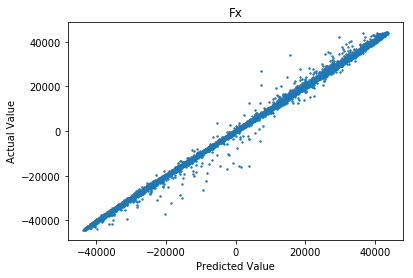

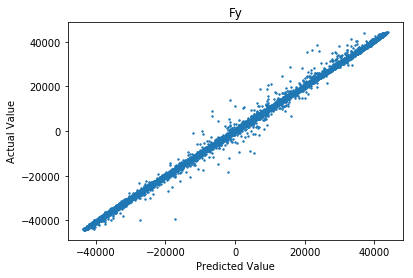

In [105]:

nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()


In [ ]:
combDF.head()

In [ ]:
a = np.vstack((np.arange(8), np.arange(7, 15), np.arange(7, 15)))
a

In [ ]:
ss = 2
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

In [ ]:
np.arange(0, a.shape[1], step = 2)

In [ ]:
a.shape[0]

In [ ]:
ss = 2

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  
bb

In [ ]:
bb[kk:(kk+ss),0:ss]

In [ ]:
ss =2
kk = 2

a[0:, kk:(ss+kk)]
bb[kk:(kk+a.shape[0]),0:ss]



In [ ]:
pd.DataFrame(a)

In [ ]:
# refref: figure out how to reshape this

a.reshape((-1, 2), order = "F")

In [ ]:
np.reshape?

In [ ]:
dd = pd.DataFrame(fa)
print(dd.shape)
dd.head()

In [ ]:
fa = dd.transpose()
fa.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
print(fa.shape)
fa.head()

In [ ]:
# make Fx and Fy
fa["Fx"] = fa.F * np.cos(fa.alpha)
fa["Fy"] = fa.F * np.sin(fa.alpha)

In [ ]:
for ii in np.arange(1, spray.shape[1], step = 8):

    tmparr = np.hstack((sparray[0, ii:ii+8], sparray[99, ii:ii+8]))

    if ii == 1:
        newArr = tmparr
    else: 
        newArr = np.vstack((newArr, tmparr))

In [ ]:
newDF = pd.DataFrame(newArr)
newDF.head()

In [ ]:
newDF.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))

In [ ]:
print(newDF.shape)
newDF.head()

In [ ]:
# drop NA's
X = np.array(newDF.dropna())
Y = np.array(fa.dropna())

# check
print(all(X[:,9] == Y[:,1]))
print(len(X))

Y = Y[:, [10, 12, 13]]
Y.shape

In [ ]:
Y[0:10, ]

In [ ]:
combDF = pd.merge(newDF.dropna(), fa.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")
print(combDF.shape)
combDF.head()

In [ ]:
# split into test and training set
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf1 = RandomForestRegressor(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred1 = clf1.predict(Xtest)

fig, ax = plt.subplots()
ax.plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.5)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

In [ ]:
for ii in range(3):
    plt.scatter(Ytest[:,ii],Ypred1[:,ii] )
    plt.show()

In [ ]:
class MultiOutputRF(object):
    
    '''From here: http://astrohackweek.org/blog/multi-output-random-forests.html'''
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, Y):
        X, Y = map(np.atleast_2d, (X, Y))
        assert X.shape[0] == Y.shape[0]
        Ny = Y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            clf = RandomForestRegressor(*self.args, **self.kwargs)
            Xi = np.hstack([X, Y[:, :i]])
            yi = Y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        Y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            Y[:, i] = clf.predict(np.hstack([X, Y[:, :i]]))
        return Y

In [ ]:
clf2 = MultiOutputRF(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred2 = clf2.predict(Xtest)

In [ ]:
# note: might want to break down into Fx and Fy, b/c radians don't work well with MSE

nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = Ypred2[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# this works surprisingly well

from sklearn.multioutput import MultiOutputRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [ ]:
mpreds = mor.predict(Xtest)

In [ ]:
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# plot residuals
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii]- mpreds[:,ii], x = np.arange(len(Ytest[:,ii])), s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# refref: next step -- neural network
#from sklearn import cross_validation
#from sklearn.neural_network import MLPRegressor

#model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,)) 
#cross_validation.cross_val_score(model, X, Y, scoring='mean_squared_error')

In [ ]:
# another possible way to rearrange the data
ss = 12
a = np.transpose(Vmat["ValSp3"])
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
forceAngle = pd.DataFrame(bb)
forceAngle.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
forceAngle